In [1]:
import polars as ps
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from hdbscan import HDBSCAN
import os

In [2]:
df = pd.read_csv('user_ratings_pca_components.csv')

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,16.694846,-15.151362,3.001791,-7.109761,-4.323034,1.751609,-5.457214,3.658158,3.161589,-3.856032,...,-0.054592,-0.051425,-0.045257,0.083006,0.069403,0.002246,0.094628,-0.015325,0.041447,0.004515
1,-3.476166,-1.447012,-1.698809,2.819187,2.550436,-1.012346,-1.246923,-0.740759,0.707620,-0.549222,...,0.000595,-0.001916,0.007668,0.012081,0.021974,-0.020813,-0.001108,0.038197,-0.004298,-0.000363
2,-3.037841,1.659122,0.072159,-1.599822,3.274254,2.826709,2.685725,-1.937527,-2.627823,-0.194772,...,0.005431,0.013598,-0.026719,-0.023594,-0.021979,-0.000879,-0.012032,-0.024053,0.012232,0.043518
3,1.551218,-4.451158,0.324679,-4.106701,2.776567,0.224195,-7.594963,-0.074660,3.229669,6.844299,...,0.011051,-0.016017,0.073991,0.008359,-0.029811,-0.011421,-0.000595,-0.014082,0.023327,0.005500
4,13.909178,-14.466568,1.174891,-4.621925,-14.938926,6.791832,-4.788293,-4.667722,-3.786940,4.925061,...,0.012376,0.012578,0.128096,0.056233,0.018127,0.032989,-0.029665,0.002841,-0.005175,-0.002282


In [4]:
df = df.drop(columns=[str(x) for x in range(539, 1000)])

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,538
0,16.694846,-15.151362,3.001791,-7.109761,-4.323034,1.751609,-5.457214,3.658158,3.161589,-3.856032,...,-1.991183,-0.948662,1.811496,-2.507562,-0.260110,1.442475,-4.192487,-0.169511,-2.003970,-0.318410
1,-3.476166,-1.447012,-1.698809,2.819187,2.550436,-1.012346,-1.246923,-0.740759,0.707620,-0.549222,...,-0.676889,0.367968,1.194986,0.241951,-0.776225,0.842125,-0.290985,0.903212,0.558371,0.194252
2,-3.037841,1.659122,0.072159,-1.599822,3.274254,2.826709,2.685725,-1.937527,-2.627823,-0.194772,...,1.117493,-0.558155,1.079374,1.227750,-0.113684,-0.679427,-0.105749,-0.584303,-0.170152,-0.070142
3,1.551218,-4.451158,0.324679,-4.106701,2.776567,0.224195,-7.594963,-0.074660,3.229669,6.844299,...,-0.162173,0.613915,-1.884113,-0.775099,-0.250483,-0.335672,1.934220,1.180392,2.042463,-1.898965
4,13.909178,-14.466568,1.174891,-4.621925,-14.938926,6.791832,-4.788293,-4.667722,-3.786940,4.925061,...,1.741873,-3.851143,-2.057896,1.869656,2.238327,-0.259554,-1.542786,-1.424952,0.535353,0.521573


In [7]:
labels = {}
inertias = {}
for k in range(2,26):
    model = KMeans(n_clusters=k, random_state=41)
    model.fit(df)
    labels[k] = model.labels_
    inertias[k] = model.inertia_
    print(f'Model M_{k} finished')

Model M_2 finished
Model M_3 finished
Model M_4 finished
Model M_5 finished
Model M_6 finished
Model M_7 finished
Model M_8 finished
Model M_9 finished
Model M_10 finished
Model M_11 finished
Model M_12 finished
Model M_13 finished
Model M_14 finished
Model M_15 finished
Model M_16 finished
Model M_17 finished
Model M_18 finished
Model M_19 finished
Model M_20 finished
Model M_21 finished
Model M_22 finished
Model M_23 finished
Model M_24 finished
Model M_25 finished


<AxesSubplot:>

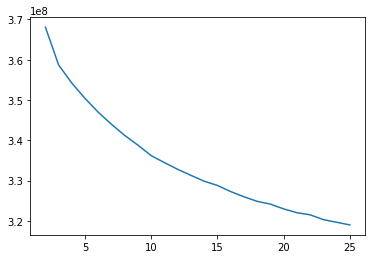

In [12]:
sns.lineplot(x=[x for x, y in inertias.items()], y=[y for x, y in inertias.items()])

In [16]:
kmeans_inertias = pd.DataFrame({'k': [x for x in range(2, 26)], 'inertia': [y for x, y in inertias.items()]})
kmeans_inertias

,k,inertia
0,2,3.680771e+08
1,3,3.586930e+08
2,4,3.541963e+08
3,5,3.503859e+08
4,6,3.469495e+08
5,7,3.439646e+08
6,8,3.411987e+08
7,9,3.387845e+08
8,10,3.361939e+08
9,11,3.344588e+08


In [17]:
kmeans_inertias.to_csv('user_kmeans_inertias.csv')

In [18]:
kmeans_labels = pd.DataFrame(labels)

In [20]:
kmeans_labels.to_csv('user_kmeans_labels.csv')

In [21]:
kmeans_labels

,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
0,1,2,1,3,2,1,2,5,2,4,...,1,5,17,5,18,10,2,20,12,0
1,0,0,2,0,4,0,0,1,5,3,...,12,2,0,0,0,1,12,10,0,21
2,0,0,2,0,4,0,0,1,5,3,...,12,2,0,0,0,1,12,10,0,21
3,0,0,2,2,5,2,3,1,4,2,...,2,3,7,18,2,4,19,8,12,18
4,1,2,1,3,2,1,2,5,2,4,...,1,5,17,5,18,10,2,20,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478558,0,0,2,0,4,0,0,1,5,3,...,12,2,0,0,0,1,12,10,0,21
478559,0,0,2,0,4,0,0,1,5,3,...,12,2,0,0,0,1,12,10,0,21
478560,0,0,2,0,4,0,0,1,5,3,...,12,2,0,0,0,1,12,10,0,21
478561,0,0,2,0,4,0,0,1,5,3,...,13,1,11,12,17,20,16,1,13,17


In [22]:
kmeans_labels.dtypes

2     int32
3     int32
4     int32
5     int32
6     int32
7     int32
8     int32
9     int32
10    int32
11    int32
12    int32
13    int32
14    int32
15    int32
16    int32
17    int32
18    int32
19    int32
20    int32
21    int32
22    int32
23    int32
24    int32
25    int32
dtype: object

In [26]:
book_ids = ps.scan_csv('data/ratings.csv')
book_ids.collect()

,user_id,19,43,49,51,66,80,100,126,134,138,150,174,176,182,197,229,236,255,257,259,260,290,297,301,307,317,325,332,370,383,384,387,400,407,410,…,21164,21193,21252,21272,21422,21489,21796,21897,21898,21926,21949,22321,22426,22530,23355,23476,23787,23801,23815,23824,24173,24366,24928,26420,26421,27983,29336,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,0,0,0,0,0,0,0,3,5,0,5,0,5,5,0,4,0,0,4,5,5,0,5,0,0,5,0,0,4,0,4,5,4,5,0,5,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,4,0,4,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,3,0,0,0,0,0,0,3,0,4,4,0,0,0,0,0,4,4,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
797600,876140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797601,876141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797602,876142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
book_ids.describe()

statistic,,user_id,19,43,49,51,66,80,100,126,134,138,150,174,176,182,197,229,236,255,257,259,260,290,297,301,307,317,325,332,370,383,384,387,400,407,…,21164,21193,21252,21272,21422,21489,21796,21897,21898,21926,21949,22321,22426,22530,23355,23476,23787,23801,23815,23824,24173,24366,24928,26420,26421,27983,29336,32624,38819,39042,42643,42701,42703,42704,42705,47273,51259
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,…,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0,797605.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",398802.0,419342.791758,0.050339,0.146891,0.13115,0.157922,0.494105,0.114446,0.053203,0.204292,0.05457,0.071098,0.138097,0.103017,0.057987,0.093826,0.383051,0.093086,0.080976,0.136746,0.052921,0.054517,0.079564,0.099424,0.13597,0.13647,0.092494,0.058524,0.13775,0.051769,0.073225,0.057067,0.189964,0.047596,0.070213,0.128176,…,0.096909,0.063126,0.054664,0.049091,0.06861,0.043357,0.103234,0.065188,0.114878,0.135958,0.053692,0.064483,0.079132,0.061124,0.064309,0.045861,0.054215,0.059314,0.091678,0.061129,0.066586,0.054972,0.053656,0.053076,0.075781,0.062318,0.073856,0.061238,0.055832,0.062704,0.055171,0.049671,0.059936,0.052451,0.056418,0.05934,0.049977
"""std""",230248.875066,252553.3963,0.47585,0.766962,0.723321,0.820841,1.312118,0.715409,0.466082,0.953499,0.473171,0.553999,0.7383,0.671676,0.477062,0.648243,1.180588,0.627655,0.579036,0.744249,0.476279,0.488534,0.571841,0.659327,0.743479,0.734304,0.609521,0.493966,0.726335,0.474147,0.537779,0.496048,0.902383,0.444177,0.547932,0.744488,…,0.639851,0.530254,0.480596,0.435427,0.525293,0.411278,0.662341,0.519887,0.675344,0.744378,0.473401,0.527428,0.56687,0.504145,0.500946,0.408042,0.475668,0.504496,0.620105,0.5069,0.521984,0.490249,0.483228,0.463843,0.551656,0.514979,0.529991,0.505179,0.465234,0.506421,0.480158,0.456601,0.500204,0.471045,0.487511,0.505683,0.436828
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",199401.0,201585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""50%""",398802.0,403536.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""75%""",598203.0,636348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [31]:
[int(x) for x in book_ids.columns[2:]]

[19,
 43,
 49,
 51,
 66,
 80,
 100,
 126,
 134,
 138,
 150,
 174,
 176,
 182,
 197,
 229,
 236,
 255,
 257,
 259,
 260,
 290,
 297,
 301,
 307,
 317,
 325,
 332,
 370,
 383,
 384,
 387,
 400,
 407,
 410,
 412,
 417,
 423,
 427,
 430,
 438,
 439,
 441,
 442,
 443,
 444,
 446,
 458,
 459,
 460,
 461,
 468,
 475,
 524,
 530,
 531,
 536,
 545,
 547,
 553,
 569,
 578,
 586,
 588,
 598,
 609,
 613,
 614,
 619,
 621,
 622,
 634,
 637,
 646,
 668,
 669,
 670,
 671,
 675,
 677,
 684,
 689,
 692,
 700,
 703,
 704,
 706,
 707,
 711,
 716,
 719,
 737,
 739,
 740,
 741,
 742,
 757,
 758,
 759,
 761,
 762,
 767,
 768,
 772,
 773,
 785,
 786,
 787,
 790,
 791,
 792,
 797,
 807,
 810,
 821,
 828,
 833,
 834,
 837,
 839,
 845,
 846,
 848,
 849,
 853,
 856,
 858,
 859,
 860,
 862,
 864,
 871,
 876,
 879,
 882,
 892,
 898,
 899,
 906,
 909,
 919,
 924,
 929,
 938,
 939,
 940,
 941,
 943,
 944,
 947,
 964,
 968,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1000,
 1002,
 1003,
 1004,
 1005,
 1007,
 100